In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd

## Imports

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading training and testing data

In [4]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
# train_data=pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
# test_data=pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

In [5]:
train_data.head(3)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...


In [6]:
train_data.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


Adding date to the data

In [8]:
# train_data['Date']=pd.to_datetime(train_data['CreationTimestamp'])
train_data['Date']=pd.to_datetime(train_data['CreationTimestamp'], unit='s')
train_data['HourOfDay']=train_data['Date'].apply(lambda x: x.hour + x.minute/60)

In [9]:
train_data.head(3)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,Date,HourOfDay
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...,2021-06-03 10:44:38,10.733333
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...,2021-06-03 10:57:32,10.950000
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...,2021-06-03 10:49:17,10.816667


In [10]:
X_train, y_train=train_data.drop('Rating', axis=1), train_data['Rating']

## Descriptive Stats and Histograms

### Correlations between attributes

In [11]:
interesting_columns=['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore', 'HourOfDay', 'RecipeNumber']

In [12]:
train_data[interesting_columns].corr()


,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,HourOfDay,RecipeNumber
UserReputation,1.000000,0.014045,0.053825,0.023986,0.015038,0.126701,0.054769,0.022084
ReplyCount,0.014045,1.000000,0.220929,0.293614,-0.124860,0.210352,0.105876,0.026537
ThumbsUpCount,0.053825,0.220929,1.000000,0.392564,-0.051752,0.693532,0.314067,0.064797
ThumbsDownCount,0.023986,0.293614,0.392564,1.000000,-0.142273,0.227341,0.165097,0.053027
Rating,0.015038,-0.124860,-0.051752,-0.142273,1.000000,-0.036719,-0.028471,-0.043127
BestScore,0.126701,0.210352,0.693532,0.227341,-0.036719,1.000000,0.429767,0.086233
HourOfDay,0.054769,0.105876,0.314067,0.165097,-0.028471,0.429767,1.000000,0.025789
RecipeNumber,0.022084,0.026537,0.064797,0.053027,-0.043127,0.086233,0.025789,1.000000


In [13]:
group_recipe_name=train_data.groupby('RecipeName')
group_recipe_name[interesting_columns].corr()

UserReputation  ReplyCount  \
RecipeName                                                              
Amish Breakfast Casserole UserReputation         1.000000    0.024830   
                          ReplyCount             0.024830    1.000000   
                          ThumbsUpCount          0.321080    0.290274   
                          ThumbsDownCount        0.210185    0.133365   
                          Rating                -0.018170   -0.103363   
...                                                   ...         ...   
Zucchini Pizza Casserole  ThumbsDownCount        0.030718    0.268509   
                          Rating                -0.233037   -0.014061   
                          BestScore              0.239652    0.103518   
                          HourOfDay              0.171924    0.064086   
                          RecipeNumber                NaN         NaN   

                                           ThumbsUpCount  ThumbsDownCount  \
RecipeName                                                                  
Amish Breakfast Casserole UserReputation        0.321080         0.210185   
                          ReplyCount            0.290274         0.133365   
                          ThumbsUpCount         1.000000         0.352453   
                          ThumbsDownCount       0.352453         1.000000   
                          Rating               -0.200689        -0.237778   
...                                                  ...              ...   
Zucchini Pizza Casserole  ThumbsDownCount       0.502138         1.000000   
                          Rating                0.038283        -0.037159   
                          BestScore             0.795473         0.476876   
                          HourOfDay             0.351219         0.168979   
                          RecipeNumber               NaN              NaN   

                                             Rating  BestScore  HourOfDay  \
RecipeName                                                                  
Amish Breakfast Casserole UserReputation  -0.018170   0.331610  -0.097661   
                          ReplyCount      -0.103363   0.188575   0.001836   
                          ThumbsUpCount   -0.200689   0.852211   0.286221   
                          ThumbsDownCount -0.237778   0.305208   0.247773   
                          Rating           1.000000  -0.168210  -0.003152   
...                                             ...        ...        ...   
Zucchini Pizza Casserole  ThumbsDownCount -0.037159   0.476876   0.168979   
                          Rating           1.000000  -0.033331   0.017869   
                          BestScore       -0.033331   1.000000   0.250466   
                          HourOfDay        0.017869   0.250466   1.000000   
                          RecipeNumber          NaN        NaN        NaN   

                                           RecipeNumber  
RecipeName                                               
Amish Breakfast Casserole UserReputation            NaN  
                          ReplyCount                NaN  
                          ThumbsUpCount             NaN  
                          ThumbsDownCount           NaN  
                          Rating                    NaN  
...                                                 ...  
Zucchini Pizza Casserole  ThumbsDownCount           NaN  
                          Rating                    NaN  
                          BestScore                 NaN  
                          HourOfDay                 NaN  
                          RecipeNumber              NaN  

[800 rows x 8 columns]

In [14]:
X_train['RecipeName'].unique()

array(['Banana Bars with Cream Cheese Frosting', 'Simple Taco Soup',
       'Cheeseburger Soup', 'Grilled Huli Huli Chicken',
       'Cauliflower Soup', 'Favorite Chicken Potpie',
       'Fluffy Key Lime Pie', 'Seafood Lasagna', 'Cheesy Ham Chowder',
       'First-Place Coconut Macaroons', 'Rhubarb Custard Bars',
       'Garlic Beef Enchiladas', 'Pork Chops with Scalloped Potatoes',
       'Peanut Butter Cup Cheesecake', 'Li’l Cheddar Meat Loaves',
       'Chicken Wild Rice Soup', 'Flavorful Chicken Fajitas',
       'Enchilada Casser-Ole!', 'Creamy White Chili',
       'Stuffed Pepper Soup', 'Lemon Blueberry Bread',
       'Chicken and Dumplings', 'Porcupine Meatballs',
       'Simple Au Gratin Potatoes', 'Basic Homemade Bread',
       'Zucchini Cupcake', 'Forgotten Jambalaya', 'Ravioli Lasagna',
       'Contest-Winning New England Clam Chowder', 'Basic Banana Muffins',
       'Creamy Grape Salad', 'Big Soft Ginger Cookies',
       'Pumpkin Spice Cupcakes with Cream Cheese Frosting',
 

In [15]:
group_recipe_name[interesting_columns].mean()

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,HourOfDay,RecipeNumber
RecipeName,,,,,,,,
Amish Breakfast Casserole,2.658635,0.012048,2.779116,0.967871,4.489960,187.622490,11.228179,4.0
Apple Pie,1.109091,0.006061,1.460606,1.369697,4.042424,162.212121,11.134747,8.0
Asian Chicken Thighs,6.274336,0.008850,0.097345,0.070796,4.584071,122.398230,11.337316,52.0
Bacon Macaroni Salad,3.097222,0.000000,0.888889,0.402778,4.486111,138.958333,10.999306,95.0
Baked Mushroom Chicken,1.462185,0.008403,0.411765,0.252101,4.453782,136.773109,11.289636,25.0
...,...,...,...,...,...,...,...,...
Vegetarian Linguine,4.052632,0.000000,1.526316,0.157895,4.631579,172.736842,10.918421,61.0
White Bean Chicken Chili,2.581633,0.010204,1.408163,1.571429,4.071429,153.591837,11.101871,69.0
Winning Apple Crisp,4.730496,0.021277,0.744681,0.333333,4.007092,152.985816,11.094681,29.0


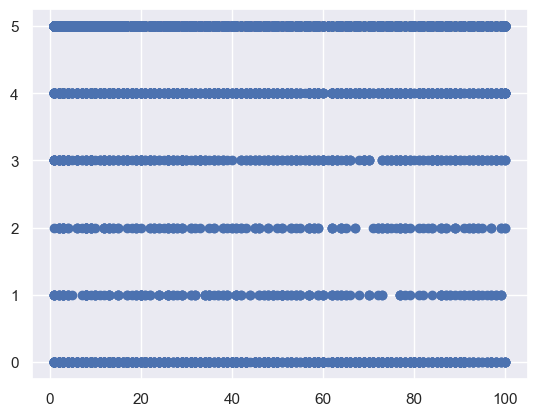

In [16]:
ax=plt.axes()
ax.scatter(train_data['RecipeNumber'], train_data['Rating'])

<Axes: >

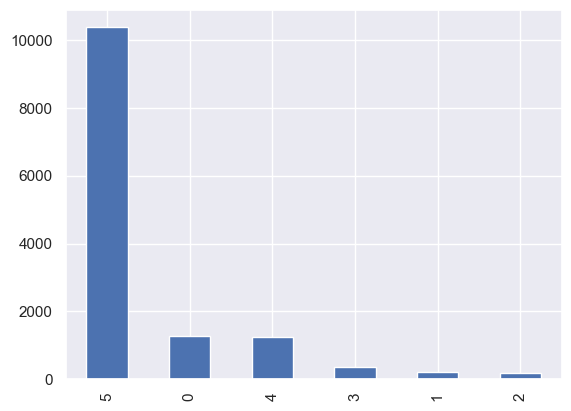

In [19]:
train_data['Rating'].value_counts().plot.bar()